In [1]:
! pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cyberghost9","key":"1bdce9d9544087ab898682d698964af7"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 674M/675M [00:27<00:00, 30.7MB/s]
100% 675M/675M [00:27<00:00, 25.8MB/s]


In [7]:
! unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [8]:
!pip install shutil
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [9]:
os.listdir('/content/cell_images')

['Uninfected', 'cell_images', 'Parasitized']

In [10]:
parasitized = glob.glob('/content/cell_images/Parasitized/*.png')
print('No. of files in the directory Parasitized', len(parasitized))


No. of files in the directory Parasitized 13779


In [11]:
parasitized[:5]

['/content/cell_images/Parasitized/C184P145ThinF_IMG_20151203_103326_cell_130.png',
 '/content/cell_images/Parasitized/C186P147NThinF_IMG_20151203_150859_cell_171.png',
 '/content/cell_images/Parasitized/C110P71ThinF_IMG_20150930_105559_cell_201.png',
 '/content/cell_images/Parasitized/C178P139NThinF_IMG_20151201_153246_cell_155.png',
 '/content/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_113842_cell_40.png']

In [12]:
uninfected = glob.glob('/content/cell_images/Uninfected/*.png')
print('No. of files in the directory Uninfected', len(uninfected))

No. of files in the directory Uninfected 13779


In [13]:
uninfected[:5]

['/content/cell_images/Uninfected/C111P72ThinF_IMG_20150930_112827_cell_64.png',
 '/content/cell_images/Uninfected/C120P81ThinF_IMG_20151002_130150_cell_153.png',
 '/content/cell_images/Uninfected/C202ThinF_IMG_20151015_151254_cell_99.png',
 '/content/cell_images/Uninfected/C206ThinF_IMG_20151029_140538_cell_12.png',
 '/content/cell_images/Uninfected/C186P147NThinF_IMG_20151203_150557_cell_155.png']

<ipython-input-14-ecb83b179708>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


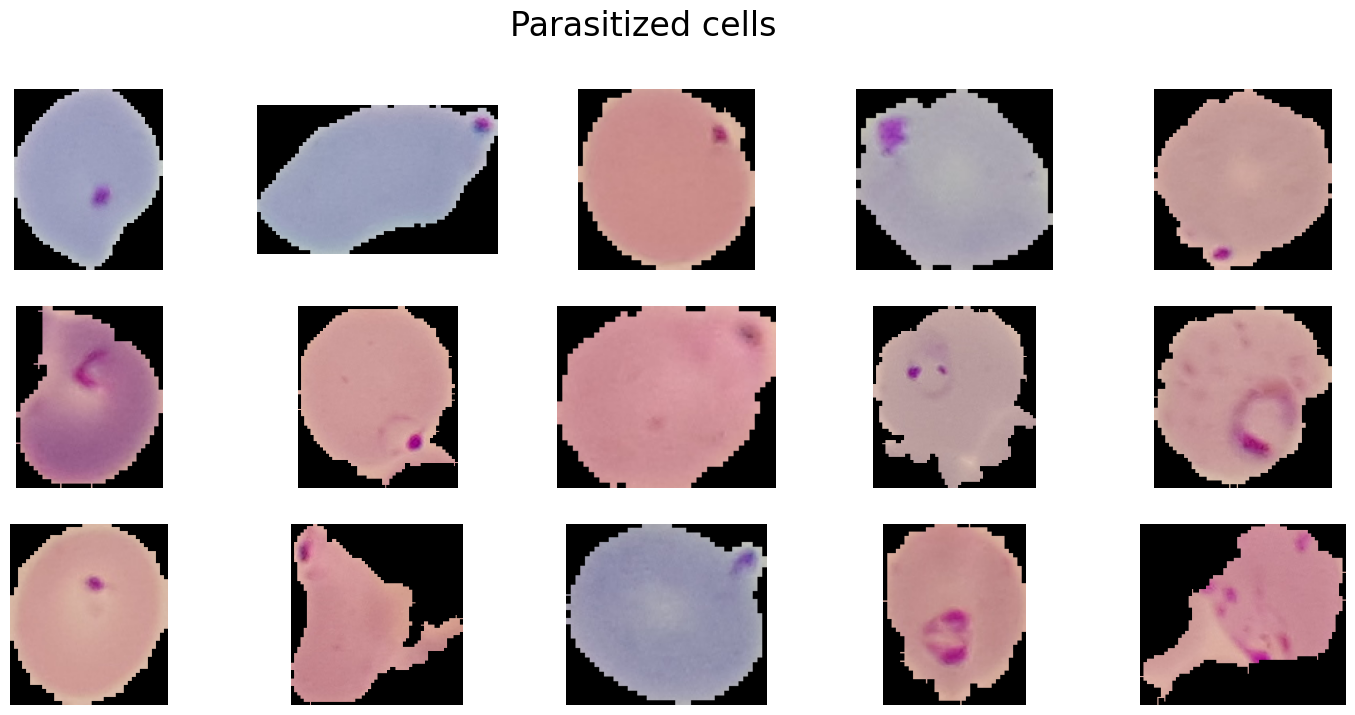

In [14]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Parasitized cells', fontsize=24)

for ind, img_src in enumerate(parasitized[:15]):
    plt.subplot(3, 5, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

<ipython-input-15-dc65af0df3b5>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


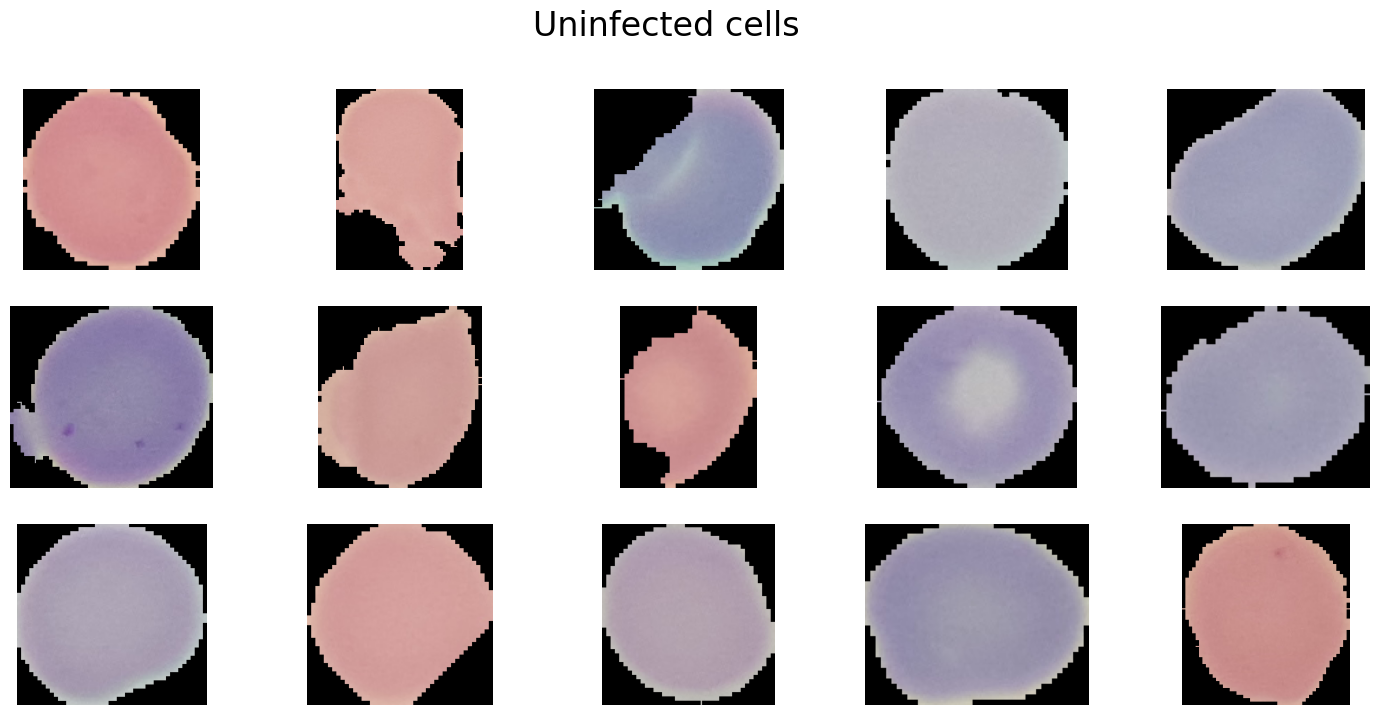

In [15]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Uninfected cells', fontsize=24)

for ind, img_src in enumerate(uninfected[:15]):
    plt.subplot(3, 5, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [16]:
data_dir = "/content/cell_images"
train_dir = "train"
test_dir = "test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_dir in ["Uninfected", "Parasitized"]:
  image_paths = [os.path.join(data_dir, class_dir, image_file) for image_file in os.listdir(os.path.join(data_dir, class_dir))]
  train_data, test_data = train_test_split(image_paths, test_size=0.2, random_state=42)
  for image_path in train_data:
    shutil.move(image_path, os.path.join(train_dir, class_dir))
  for image_path in test_data:
    shutil.move(image_path, os.path.join(test_dir, class_dir))

  print(f"Finished splitting {class_dir} data")


Finished splitting Uninfected data
Finished splitting Parasitized data


Model parameters

In [17]:
BATCH_SIZE = 100
IMG_SHAPE  = 150
TARGET_SIZE = 64
EPOCHS = 20

Model Initialization

In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [19]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)



In [20]:
train_data = datagen.flow_from_directory('/content/cell_images/cell_images',
                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory('/content/cell_images/cell_images',
                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              class_mode='binary',
                                              subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [27]:
#Callback
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta = 0.01,
                               patience=5)

model_save = ModelCheckpoint('best_model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)




In [28]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[early_stopping, model_save])

Epoch 1/20
193/193 [==============================] - 182s 946ms/step - loss: 0.2290 - accuracy: 0.9223 - val_loss: 0.2209 - val_accuracy: 0.9102
Epoch 2/20
193/193 [==============================] - 178s 924ms/step - loss: 0.2182 - accuracy: 0.9279 - val_loss: 0.2058 - val_accuracy: 0.9189
Epoch 3/20
193/193 [==============================] - 178s 924ms/step - loss: 0.2120 - accuracy: 0.9305 - val_loss: 0.2302 - val_accuracy: 0.9101
Epoch 4/20
193/193 [==============================] - 178s 920ms/step - loss: 0.2059 - accuracy: 0.9309 - val_loss: 0.2008 - val_accuracy: 0.9252
Epoch 5/20
193/193 [==============================] - 177s 919ms/step - loss: 0.2006 - accuracy: 0.9320 - val_loss: 0.1974 - val_accuracy: 0.9291
Epoch 6/20
193/193 [==============================] - 177s 919ms/step - loss: 0.1932 - accuracy: 0.9357 - val_loss: 0.1855 - val_accuracy: 0.9332
Epoch 7/20
193/193 [==============================] - 181s 938ms/step - loss: 0.1925 - accuracy: 0.9367 - val_loss: 0.1801 -

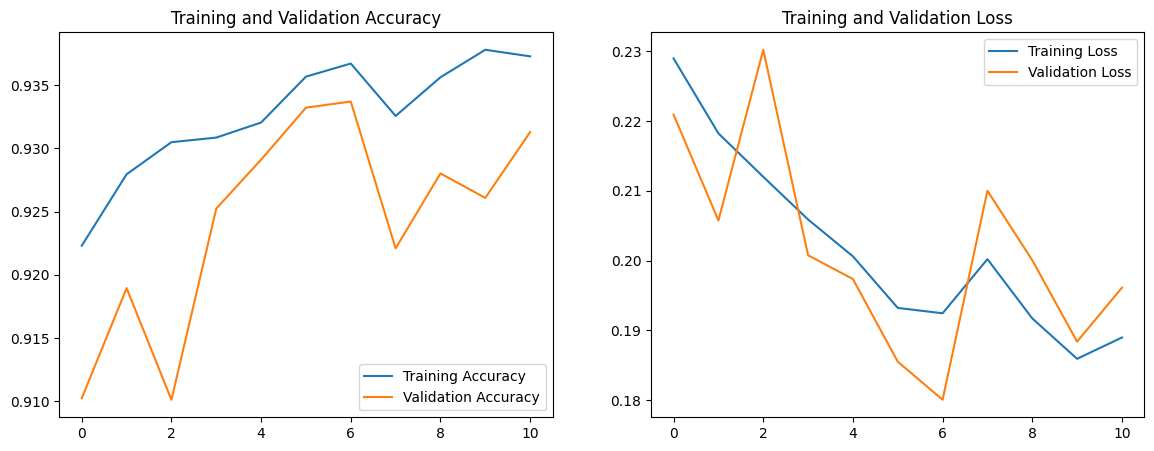

In [29]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [30]:
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history.csv", index=False)

In [31]:
history_df = pd.read_csv("training_history.csv")

In [32]:
training_accuracy = history_df["accuracy"]
validation_accuracy = history_df["val_accuracy"]
training_loss = history_df["loss"]
validation_loss = history_df["val_loss"]

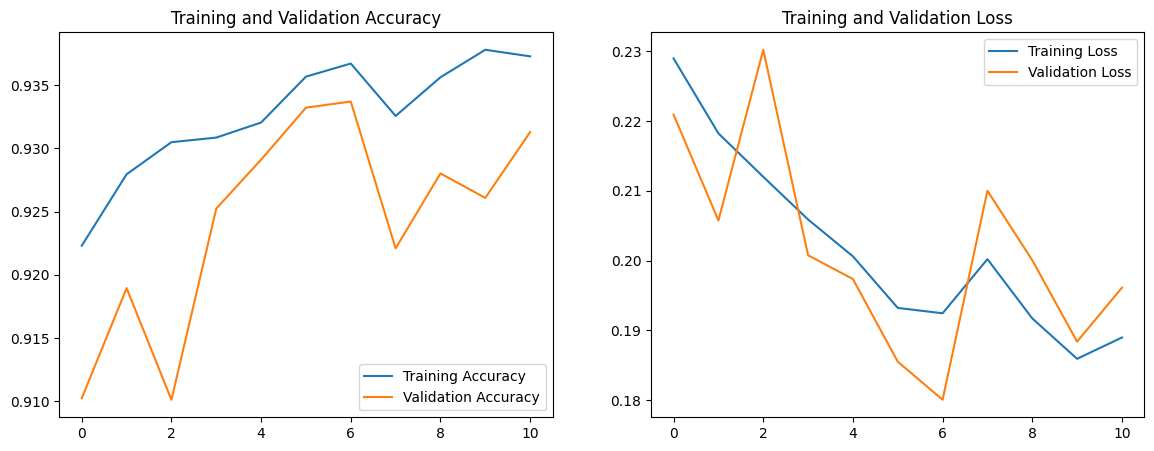

In [33]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [34]:
model = load_model('/content/drive/MyDrive/Projects/Malaria diagonisis/best_model.h5')

In [35]:
test_generator = datagen.flow_from_directory(
    '/content/cell_images/cell_images',
    target_size=(IMG_SHAPE,IMG_SHAPE),
    batch_size=32,
    class_mode='binary'
)

Found 27558 images belonging to 2 classes.


In [36]:
predictions = model.predict(test_generator)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

862/862 [==============================] - 176s 204ms/step - loss: 0.2077 - accuracy: 0.9297
Test accuracy: 0.9297118782997131


In [37]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', cm)

print('Classification Report:\n', classification_report(y_true, y_pred))


Confusion Matrix:
 [[13779     0]
 [13779     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     13779
           1       0.00      0.00      0.00     13779

    accuracy                           0.50     27558
   macro avg       0.25      0.50      0.33     27558
weighted avg       0.25      0.50      0.33     27558



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
